# Gaussian Processes Regression - Function-space view

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import scipy


# if the widget thing doesn't works: jupyter nbextension enable --py --sys-prefix widgetsnbextension
# %matplotlib notebook

### Analogy: Taylor series and Fourier transformation

### Kernel functions

Gaussian kernel:

$K\left(x_1, x_2\right)=\exp \left[{-{\frac {(x_1-x_2)^{2}}{2\sigma^{2}}}}\right]$

where,

- $\sigma =\frac{\mathrm{l}_{FWHM}}{2{\sqrt {2\ln 2}}}$ and

- $\mathrm {l}_{FWHM}$ is the full width at half maximum.

In [3]:
# Abstract class for kernels
class Kernel(object):
    pass


class GaussianKernel(Kernel):
    
    def __init__(self, l=1):
        self.l = l     # Full with at half maximum (FWHM)
    
    @property
    def sigma(self):
        return self.l/(2*np.sqrt(2*np.log(2)))
    
    def __call__(self, x1, x2):

        out = np.zeros((len(x1),len(x2)))
        for i, xi in enumerate(x1):
            for j, xj in enumerate(x2):
                 out[i,j] = np.exp(- (xi-xj)**2 / (2 * self.sigma**2))

        return out
    


In [4]:
# Abstract class for the test functions
class TestFunctions(object):
    pass

class TestSine(TestFunctions):
        
    def __call__(self, x):
        return np.sin(x)
    

In [5]:
def gp_solve(x_train, y_train, x_pred, kernel, sigma2e=0):
    # training covariance matrix (used to get relationships in training)
    k_x_x = kernel(x_train, x_train)

    # compute covariance between training and testing (used to predict weights into new data), these are redundant
    k_x_xp = kernel(x_train, x_pred)
    k_xp_x = kernel(x_pred, x_train)
    
    # compute covariance between testing (used to estimate covariance of predictions in new data)
    k_xp_xp = kernel(x_pred,x_pred)
    
    # compute the prediction without noise = K(xs,x) K(x,x)^{-1} y [eq 2.19]
    # Mean and covariance functions now include noise [eq 2.22-2.24], which only requires adding an identity/ridge term to the variance component
    # Vinv = np.linalg.solve(k_x_x + sigma2e * np.identity(len(k_x_x)), np.identity(len(k_x_x)))

    Vinv = np.linalg.inv(k_x_x + sigma2e * np.identity(len(k_x_x)))

    
    # compute the estimate and variance for the prediction (note, does not depend on y) [eq 2.19 or 2.23]
    mu = k_xp_x.dot(Vinv).dot(y_train)
    var = k_xp_xp - k_xp_x.dot(Vinv).dot(k_x_xp)

    return mu, var

def plot_kernel(x_min, x_max, x_train, y_train, kernel, sigma2e):
    x_pred= np.linspace(x_min, x_max, 100)
    
    k_x_x = kernel(x_train, x_train)
    k_xp_x = kernel(x_pred, x_train)

    Vinv = np.linalg.inv(k_x_x + sigma2e * np.identity(len(k_x_x)))

    alpha = Vinv.dot(y_train)
  
    # print("alpha", alpha.shape)
    # print(alpha)
    # print("k_xp_x*alpha", (k_xp_x*alpha).shape)

    plt.plot(x_pred, k_xp_x)
    plt.xlabel("x")
    plt.ylabel("y")

    plt.show()

    plt.plot(x_pred, k_xp_x*alpha)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

    plt.plot(x_pred, np.sum(k_xp_x*alpha, axis=1))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()
    

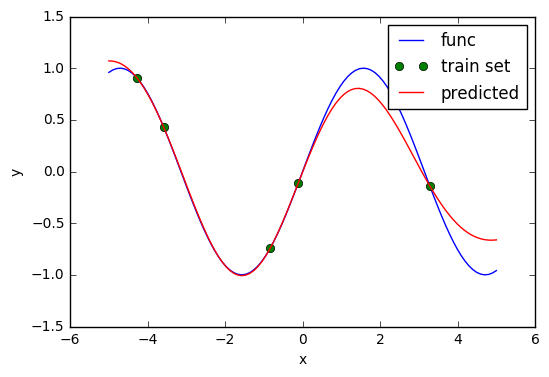

In [6]:
np.random.seed(2)   # restoring the pseudo-random generator

################################################
# Determine the function

func = TestSine()


################################################
# Parameters 

n_train = 5   # number of training point
n_test = 100  # number of evaluation


################################################
# generate train set
# Select the type of distribution for generating trining data set

# Gaussian distribution
mu, sigma = 0, 2
x_train = np.random.normal(loc=0, scale=2, size=n_train)         

# uniform distribution
# x_train = np.random.uniform(low=-5, high=5, size=n_train)        

# equaly spaced 
# x_train = np.linspace(-5, 5, n_train)                            


################################################
# generate some training values
y_train = func(x_train)

################################################
# generate test points
x_test = np.linspace(-5, 5, n_test)

################################################
# Select a kernel function
kernel = GaussianKernel(l=5)

################################################
# solve the GP (without noise) 
mu, var = gp_solve(x_train, y_train, x_test, kernel, sigma2e = 0)

################################################
# Visualisation
plt.plot(x_test,func(x_test), label="func")
plt.plot(x_train, y_train, "o", label="train set")
plt.plot(x_test, mu, label="predicted")

plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='upper right')
plt.show()



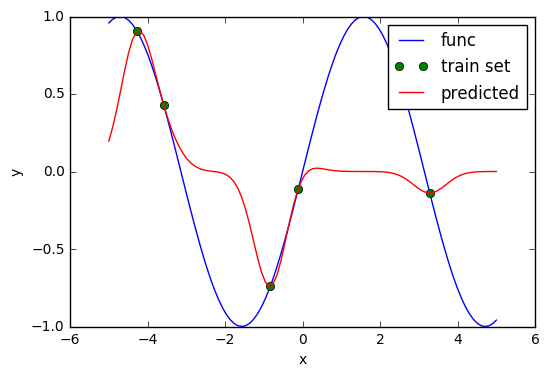

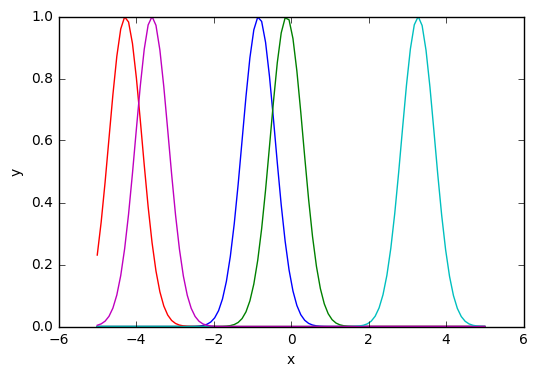

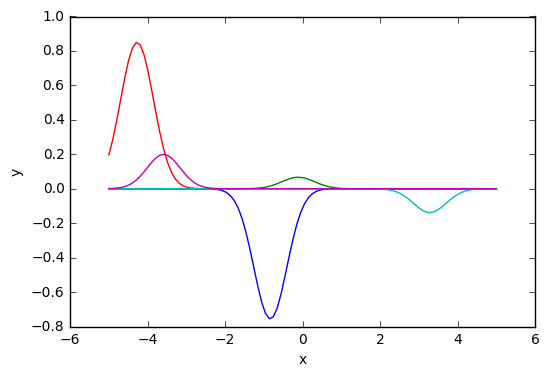

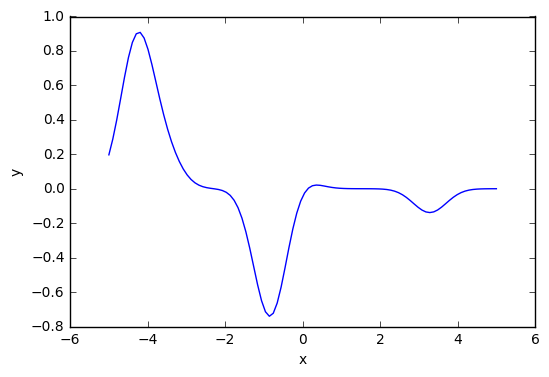

<function __main__.reg_sin>

In [8]:
def reg_sin(n_train, l, sigma2e):

    np.random.seed(2)   # restoring the pseudo-random generator

    ################################################
    # Determine the function

    func = TestSine()


    ################################################
    # Parameters 

    n_test = 100  # number of evaluation


    ################################################
    # generate train set
    # Select the type of distribution for generating trining data set

    # Gaussian distribution
    mu, sigma = 0, 2
    x_train = np.random.normal(loc=0, scale=2, size=n_train)         

    # uniform distribution
    # x_train = np.random.uniform(low=-5, high=5, size=n_train)        

    # equaly spaced 
    # x_train = np.linspace(-5, 5, n_train)                            


    ################################################
    # generate some training values
    y_train = func(x_train)

    ################################################
    # generate test points
    x_test = np.linspace(-5, 5, n_test)

    ################################################
    # Select a kernel function
    kernel = GaussianKernel(l=l)

    ################################################
    # solve the GP (without noise) 
    mu, var = gp_solve(x_train, y_train, x_test, kernel, sigma2e = sigma2e)

    ################################################
    # Visualisation
    plt.plot(x_test,func(x_test), label="func")
    plt.plot(x_train, y_train, "o", label="train set")
    plt.plot(x_test, mu, label="predicted")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc='upper right')
    plt.show()


    
    plot_kernel(-5, 5, x_train, y_train, kernel, sigma2e)
    plt.show()


n_widget = widgets.IntSlider(min=1, max=30, step=1, value=5, continuous_update=False)
l_widget = widgets.FloatSlider(min=.0001, max=5, value=1, continuous_update=False)
e_widget = widgets.FloatSlider(min=0, max=.5, value=0, step=0.01,continuous_update=False)

widgets.interact(reg_sin, n_train=n_widget, l=l_widget, sigma2e=e_widget)
